In [2]:
import numpy as np
import scipy.io.wavfile as wav
import pickle
import matplotlib.pyplot as plt
import librosa
import librosa.display
%matplotlib inline
from NMFtoolbox.forwardSTFT import forwardSTFT
from NMFtoolbox.utils import make_monaural, pcmInt16ToFloat32Numpy


In [47]:
track_path = "/home/tsimoes/tcc/dsp_method/TCC-DSP/output/SA/3/[0336] S3AG1+[0228] S2CX2+[0245] S2CU3-CU.wav"
track_path_5 =  "/home/tsimoes/tcc/dsp_method/TCC-DSP/output/SA/5/[0336] S3AG1+[0228] S2CX2+[0245] S2CU3+[0141] S1RR4+[0154] S1RP1-CU.wav"  
grd_truth_path = "/home/tsimoes/tcc/dsp_method/TCC-DSP/output/SA/1/[0245] S2-CU3-01-SA.wav"

# carrega o sinal de audio
x_track, fs_track = librosa.load(track_path,mono=True)
x_track_5, fs_track_5 = librosa.load(track_path_5,mono=True)
x_grd, fs_grd = librosa.load(grd_truth_path,mono=True)


In [81]:
# Computa a STFT - salva o A (espectograma de magnitude)
A     = librosa.stft(x_track)
A_5     = librosa.stft(x_track_5)
A_grd = librosa.stft(x_grd)

A_db       = librosa.amplitude_to_db(np.abs(A), ref=np.max)
A_db_5     = librosa.amplitude_to_db(np.abs(A_5), ref=np.max)
A_grd_db   = librosa.amplitude_to_db(np.abs(A_grd), ref=np.max)
diff       = len(A_grd_db[1]) - len(A_db[1])

A_grd_db = np.delete(A_grd_db, slice(0,diff-121), axis=1)
#A_grd_db = np.delete(A_grd_db, slice(len(A_grd_db[1])-diff,len(A_grd_db[1])), axis=1)
offset = 960

A_grd_db   = np.delete(A_grd_db, slice(len(A_grd_db[1])-offset,len(A_grd_db[1])), axis=1)
A_db       = np.delete(A_db, slice(len(A_db[1])-offset,len(A_db[1])), axis=1)
A_db_5     = np.delete(A_db_5, slice(len(A_db_5[1])-offset,len(A_db_5[1])), axis=1)

print(A_grd_db.shape)


(1025, 242)


In [45]:

len(A_db[1])

121

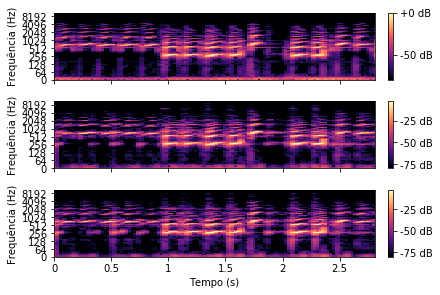

In [82]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, constrained_layout = True)

img0 = librosa.display.specshow(A_grd_db, x_axis='s', y_axis='log', ax=ax[0])

img1 = librosa.display.specshow(A_db, x_axis='s', y_axis='log', ax=ax[1])

img2 = librosa.display.specshow(A_db_5, x_axis='s', y_axis='log', ax=ax[2])

ax[2].set(xlabel='Tempo (s)')
ax[2].set(ylabel='Frequência (Hz)')
ax[1].set(ylabel='Frequência (Hz)')
ax[0].set(ylabel='Frequência (Hz)')

fig.colorbar(img0, ax=[ax[0]], format="%+2.f dB",location=None)
#fig.axes[2].set_visible(False)
# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    ax_i.label_outer()
fig.colorbar(img1, ax=[ax[1]], format="%+2.f dB")
fig.colorbar(img2, ax=[ax[2]], format="%+2.f dB")



In [ ]:
fig.savefig('cu.png', dpi=400)

In [4]:
E = np.sum(A**2,axis=0)
E_grd = np.sum(A_grd**2,axis=0)

In [5]:
E.shape

(2332,)

TypeError: Invalid shape (2332,) for image data

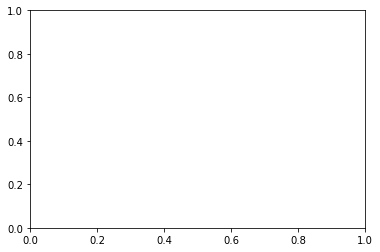

In [10]:
# plotar com o log eu dou mais peso as componentes de menos energia, estou comprimindo o sinal
plt.imshow(np.log(1+E*100), origin="lower", aspect="auto")
plt.colorbar()
plt.show()



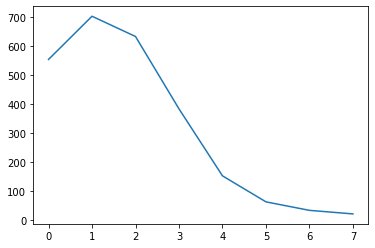

In [ ]:
plt.plot(np.sum(components[3][5]**2,axis=0))
plt.show()

In [ ]:
# Soma todos os templates e gera uma media para cada articulação
average_components = {}
for component in components.keys():
    template_sum = components[component][0]
    num_templates = len(components[component])
    for template_i in range(1, num_templates):
        template_sum = template_sum + components[component][template_i]
    average_template = template_sum/num_templates
    average_components[component] = average_template

template_file = open(f"{track}-template.pkl", "wb")
pickle.dump(average_components, template_file)
template_file.close()
